Question 1: How can Instacart optimize product recommendations to increase average order value (AOV)?

Objective: Build a product recommendation system using Market Basket Analysis.

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

order_prior = pd.read_csv(r'D:\Portfolio\Projects\Instacart\data\order_prior_cleaned.csv')

In [2]:
# STEP 1: Focus on Top 100 Products to Reduce Complexity
# Find the top 100 most ordered products
top_products = order_prior['product_name'].value_counts().head(100).index

In [3]:
# Filter dataset for only these top products
basket = order_prior[order_prior['product_name'].isin(top_products)]

In [4]:
# Ensure each order_id and product_name pair is unique
basket = basket[['order_id', 'product_name']].drop_duplicates()

In [5]:
# Pivot the table to create a transactional dataset
basket_pivot = basket.pivot_table(
    index='order_id',
    columns='product_name',
    aggfunc=lambda x: 1,  # Mark presence with 1
    fill_value=0
)

In [6]:
# Display the sample to confirm conversion
print(basket_pivot.head())

product_name  100% Raw Coconut Water  100% Whole Wheat Bread  \
order_id                                                       
2                                  0                       0   
3                                  0                       0   
5                                  0                       0   
9                                  0                       0   
10                                 0                       0   

product_name  2% Reduced Fat Milk  Apple Honeycrisp Organic  Asparagus  \
order_id                                                                 
2                               0                         0          0   
3                               0                         0          0   
5                               1                         0          0   
9                               0                         0          0   
10                              0                         0          0   

product_name  Bag of Organic Ban

In [7]:
# Convert the pivot table to boolean values
basket_pivot = basket_pivot.astype(bool)

# Confirm conversion
print(basket_pivot.dtypes)

product_name
100% Raw Coconut Water                            bool
100% Whole Wheat Bread                            bool
2% Reduced Fat Milk                               bool
Apple Honeycrisp Organic                          bool
Asparagus                                         bool
                                                  ... 
Unsalted Butter                                   bool
Unsweetened Almondmilk                            bool
Unsweetened Original Almond Breeze Almond Milk    bool
Whole Milk                                        bool
Yellow Onions                                     bool
Length: 100, dtype: object


In [8]:
# STEP 1: Apply the Apriori Algorithm
# Identify frequent itemsets with a minimum support of 0.02
frequent_itemsets = apriori(
    basket_pivot,
    min_support=0.02,  # Adjust support threshold
    use_colnames=True
)

# STEP 2: Calculate the Number of Frequent Itemsets
# Get the length of the frequent_itemsets DataFrame
num_itemsets = len(frequent_itemsets)

# STEP 3: Generate Association Rules
# Generate association rules by passing the number of itemsets
rules = association_rules(
    frequent_itemsets,
    metric='lift', 
    min_threshold=1.2, 
    num_itemsets=num_itemsets  # Add the number of frequent itemsets
)

# STEP 4: Display the Top 10 Rules
# Sort rules by lift and display the top 10
print(rules.sort_values(by='lift', ascending=False).head(10))

                antecedents               consequents  antecedent support  \
2  (Bag of Organic Bananas)    (Organic Hass Avocado)            0.161383   
3    (Organic Hass Avocado)  (Bag of Organic Bananas)            0.090839   
6                  (Banana)         (Organic Avocado)            0.200985   
7         (Organic Avocado)                  (Banana)            0.075201   
4  (Bag of Organic Bananas)    (Organic Strawberries)            0.161383   
5    (Organic Strawberries)  (Bag of Organic Bananas)            0.112572   
0  (Bag of Organic Bananas)    (Organic Baby Spinach)            0.161383   
1    (Organic Baby Spinach)  (Bag of Organic Bananas)            0.102891   

   consequent support   support  confidence      lift  representativity  \
2            0.090839  0.026514    0.164293  1.808621               1.0   
3            0.161383  0.026514    0.291880  1.808621               1.0   
6            0.075201  0.022709    0.112990  1.502508               1.0   
7     

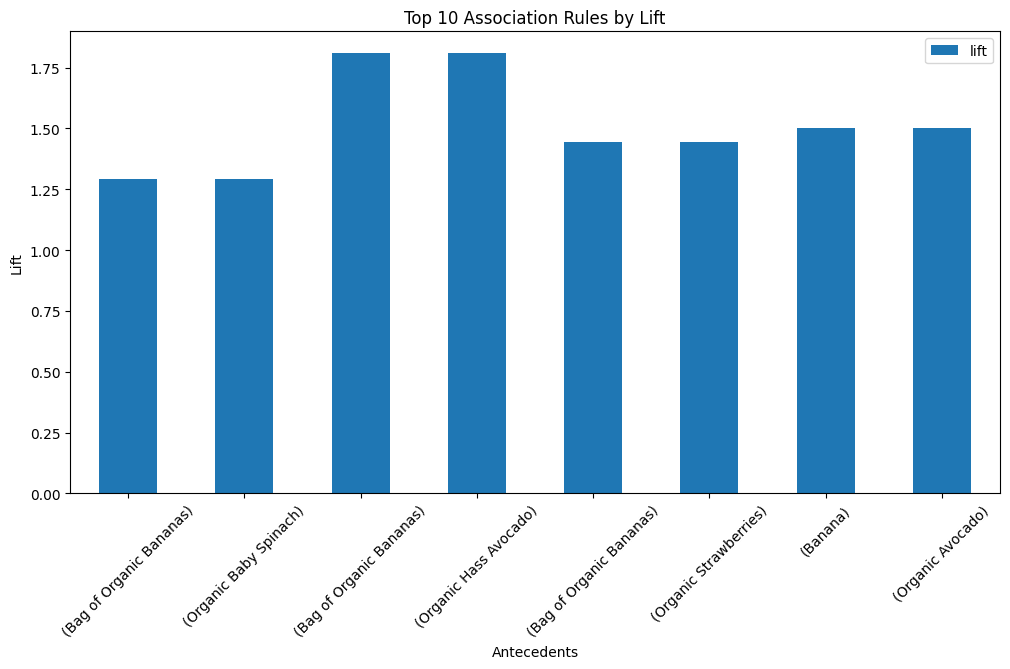

In [9]:
# Plot the Top 10 Rules by Lift
rules.head(10).plot(
    kind='bar', 
    x='antecedents', 
    y='lift', 
    figsize=(12, 6), 
    title='Top 10 Association Rules by Lift'
)
plt.xlabel('Antecedents')
plt.ylabel('Lift')
plt.xticks(rotation=45)
plt.show()